In [1]:
import os
# os.environ['KERAS_BACKEND'] = "theano"
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, RMSprop
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from utils import backprop_decision_boundary, backprop_make_classification, backprop_make_moons
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('figure', figsize=(8, 6))
%matplotlib inline

/Users/jaidevd/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Getting started with the Keras Sequential model

## The Sequential model is a linear stack of layers.

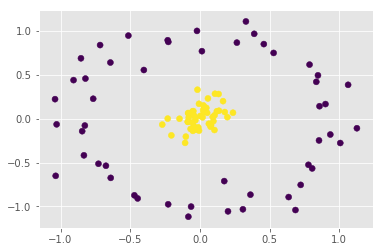

In [2]:
# simulate data
X, Y = backprop_make_classification()
plt.scatter(X[:, 0], X[:, 1], c=Y.argmax(1))

## Same neural network architecture as before, but now in keras:
### 1. Input layer has two neurons
### 2. Hidden layer has three neurons
### 3. Output layer has two neurons

In [3]:
model = Sequential()
model.add(Dense(3, input_dim=2)) # input layer is implicit
model.add(Activation('sigmoid'))
model.add(Dense(2)) # input dimensions are inferred
model.add(Activation('sigmoid'))

In [4]:
l0 = model.layers[0]

In [5]:
l0.input_shape

(None, 2)

## Compilation Step:

In [6]:
sgd = SGD(lr=0.1)
model.compile(optimizer=sgd, loss="binary_crossentropy", metrics=['accuracy'])

## Training:

In [7]:
model.fit(X, Y)

Epoch 1/1
100/100 [==============================] - 0s 3ms/step - loss: 0.7006 - acc: 0.5400


Accuracy:  0.5


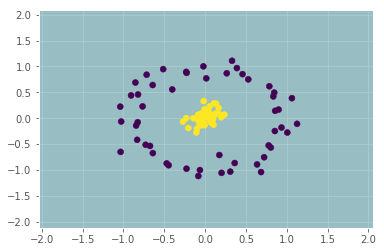

In [8]:
# make dummy data
backprop_decision_boundary(model.predict, X, Y)
y_hat = model.predict(X)
print("Accuracy: ", accuracy_score(np.argmax(Y, axis=1), np.argmax(y_hat, axis=1)))

# Q: What went wrong?

In [ ]:
model = Sequential()
model.add(Dense(3, input_dim=2)) # input layer is implicit
model.add(Activation('sigmoid'))
model.add(Dense(2)) # input dimensions are inferred
model.add(Activation('sigmoid'))
# Why design the NN again?
model.compile(optimizer=sgd, loss="binary_crossentropy", metrics=['accuracy'])
model.fit(X, Y, epochs=10000, verbose=0)
backprop_decision_boundary(model.predict, X, Y)
y_hat = model.predict(X)
print("Accuracy: ", accuracy_score(np.argmax(Y, axis=1), np.argmax(y_hat, axis=1)))

# Q: How do we reduce epochs?

In [ ]:
model = Sequential()
model.add(Dense(3, input_dim=2)) # input layer is implicit
model.add(Activation('sigmoid'))
model.add(Dense(2)) # input dimensions are inferred
model.add(Activation('sigmoid'))
sgd.lr = 0.4
model.compile(optimizer=sgd, loss="binary_crossentropy", metrics=['accuracy'])
model.fit(X, Y, epochs=1000, verbose=0)
backprop_decision_boundary(model.predict, X, Y)
y_hat = model.predict(X)
print("Accuracy: ", accuracy_score(np.argmax(Y, axis=1), np.argmax(y_hat, axis=1)))

## Exercise: Make a neural network to classify MNIST data
## Hints: 
### 1. Two hidden layers, first of size 128, second of size 64.
### 2. Use "categorical_crossentropy" loss function
### 3. Use the RMSprop optimizer

In [ ]:
digits = load_digits()
X = digits.data
X /= 255
y = digits.target
y = OneHotEncoder().fit_transform(y.reshape(-1, 1))  # What is this?
y = y.todense()
print(X.shape)

In [ ]:
# enter code here
# create a Sequential model
# Add the three layers and their activations
# compile the model with the RMSprop optimizer and the loss
# Train the model
# compute the accuracy